In [1]:
from pathlib import Path

BASE_DIR = Path('/home/jovyan/work/homework')
PURCHAISES_PATH = BASE_DIR / 'data/purchase_log.txt'
VISITS_PATH = BASE_DIR / 'data/visit_log.csv'
FUNNEL_PATH = BASE_DIR / 'data/funnel.csv'

### Задание 1

In [2]:
import json

In [3]:
# посмотрим, в каком формате у нас находятся данные
with open(PURCHAISES_PATH, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        print(line.strip())
    
        if i >= 5:
            break

{"user_id": "user_id", "category": "category"}
{"category": "Продукты", "user_id": "1840e0b9d4"}
{"user_id": "4e4f90fcfb", "category": "Электроника"}
{"user_id": "afea8d72fc", "category": "Электроника"}
{"user_id": "373a6055fe", "category": "Бытовая техника"}
{"user_id": "9b2ab046f3", "category": "Электроника"}


Потенциально, в списке могут быть пересечения, когда одному и тому же пользователю сопоставлено несколько категорий. В задании не сказано явно, что делать в этом случае, но судя по данной формулировке, перевести нужно в простой словарь без вложенных списков.

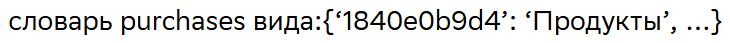

В решении будем считать, что категория, встретившаяся познее в файле перезаписывает существующую.

In [4]:
purchases = {}

with open(PURCHAISES_PATH, 'r', encoding='utf-8') as f:
    next(f)
    for line in f:
        purchaise = json.loads(line)

        user_id = purchaise['user_id']
        category = purchaise['category']

        purchases[user_id] = category

for i, (user, purchaise) in enumerate(purchases.items()):
    print(user, purchaise)

    if i >= 5:
        break

1840e0b9d4 Продукты
4e4f90fcfb Электроника
afea8d72fc Электроника
373a6055fe Бытовая техника
9b2ab046f3 Электроника
9f39d307c3 Электроника


### Задание 2

In [5]:
import csv

In [6]:
# посмотрим, в каком формате у нас находятся данные
with open(VISITS_PATH, 'r', encoding='utf-8') as visits_f:
    visits = csv.reader(visits_f)
    for i, visit in enumerate(visits):
        print(visit)

        if i >= 5:
            break

['user_id', 'source']
['6450655ae8', 'other']
['b4ea53e670', 'other']
['0e37347152', 'other']
['96064ae9e0', 'other']
['e1bd168161', 'context']


In [7]:
with open(VISITS_PATH, 'r', encoding='utf-8') as visits_f:
    with open(FUNNEL_PATH, 'w', encoding='utf-8', newline='') as funnel_f:
        visits = csv.reader(visits_f)
        funnel = csv.writer(funnel_f)

        header = next(visits)
        header.append('category')
        funnel.writerow(header)

        for visit in visits:
            user_id = visit[0]
            visit.append(purchases.get(user_id))
            funnel.writerow(visit)

with open(FUNNEL_PATH, 'r', encoding='utf-8') as f:
    lines = csv.reader(f)
    for i, line in enumerate(lines):
        print(line)

        if line[2] and i > 1:
            break

['user_id', 'source', 'category']
['6450655ae8', 'other', '']
['b4ea53e670', 'other', '']
['0e37347152', 'other', '']
['96064ae9e0', 'other', '']
['e1bd168161', 'context', '']
['71bcf169b4', 'other', '']
['e0aee73c5d', 'other', '']
['1f8845e157', 'context', '']
['78d22c5c78', 'other', '']
['dd85040770', 'other', '']
['2301051b25', 'other', '']
['86835b81ac', 'context', '']
['90d9a575a2', 'other', '']
['1b75c4f23f', 'other', '']
['d94b908660', 'None', '']
['f697206af5', 'other', '']
['8a9a2de36e', 'other', '']
['dd3d43c266', 'context', '']
['f6401d302f', 'context', '']
['b18d58560b', 'email', '']
['ed79586589', 'other', '']
['1840e0b9d4', 'other', 'Продукты']


### Extra

In [8]:
from collections import defaultdict

In [9]:
multiple_purchases = defaultdict(list)

with open(PURCHAISES_PATH, 'r', encoding='utf-8') as f:
    next(f)
    for line in f:
        purchaise = json.loads(line)

        user_id = purchaise['user_id']
        category = purchaise['category']

        multiple_purchases[user_id].append(category)

print(f'У {sum(len(category) > 1 for category in multiple_purchases.values())} пользователей(я) (из {len(multiple_purchases)}) больше одной категории')

У 481 пользователей(я) (из 99517) больше одной категории
